

```
# This is formatted as code
```

## Survival Guide

1. Always start by pressing the drop down arrow by Connect on the top right, and "Connect to a hosted runtime: T4"
2. From that dropdown, "View Resources" to check you have a GPU and monitor memory
3. If things go awry, Runtime >> Disconnect and Delete Runtime, Connect again, and then run cells from the top
4. Always run the pip installs! Ignore pip dependency errors.

Runtime >> Restart session: this restarts the Python Kernel, but pip packages remain installed and the disk remains the same.

Runtime >> Disconnect and delete session. This wipes everything.

In [ ]:
!pip install -q --upgrade transformers==4.56.2

In [ ]:
# Let's check the GPU - it should be a Tesla T4

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)
  if gpu_info.find('Tesla T4') >= 0:
    print("Success - Connected to a T4")
  else:
    print("NOT CONNECTED TO A T4")

# Connecting Hugging Face

You'll need to log in to the HuggingFace hub if you've not done so before.

1. If you haven't already done so, create a **free** HuggingFace account at https://huggingface.co and navigate to Settings from the user menu on the top right. Then select Access Tokens, then click the Create new token button near the top right. THEN be sure to click the button "Write" under 'Token type'.

  **IMPORTANT** when you create your HuggingFace Access Token, please be sure to select WRITE permissions for your key by clicking on the "Write" button, otherwise you may get problems later. Not "fine-grained" but "Write".

  In the field "Token name" you can put anything you want, like "My HF Token". This field is just for your reference.

  Then press "Create token" and then copy it into your clipboard, and keep a record of your token! It should start "hf_..."

2. Back here in colab, press the "key" icon on the side panel to the left, and add a new secret:  
  In the name field put `HF_TOKEN`  
  In the value field put your actual access token: `hf_...`  
  Ensure the notebook access switch is turned ON.

3. Execute the cell below to log in. You'll need to do this on each of your colabs. It's a really useful way to manage your secrets without needing to type them into colab.

In [1]:
from huggingface_hub import login
from google.colab import userdata


hf_token = userdata.get('HF_TOKEN')
login(hf_token, add_to_git_credential=True)

In [5]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load tokenizer and model automatically
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2")

# Encode and generate
inputs = tokenizer("Hello world, How are you", return_tensors="pt")
outputs = model.generate(**inputs, max_length=30)

print(tokenizer.decode(outputs[0]))


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Hello world, How are you?

I'm a little bit of a nerd. I'm a little bit of a nerd. I'm a


Sentiment Classification Task

In [7]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")
classifier("Hello World! Have a wonderful day today")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9998817443847656}]

Text Translation Task

In [8]:
from transformers import pipeline

# Create a translation pipeline
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-fr")

# Translate English → French
result = translator("Hugging Face makes NLP easy to use!")
print(result[0]['translation_text'])


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda:0


Hugging Face rend NLP facile à utiliser!


Image Generation

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

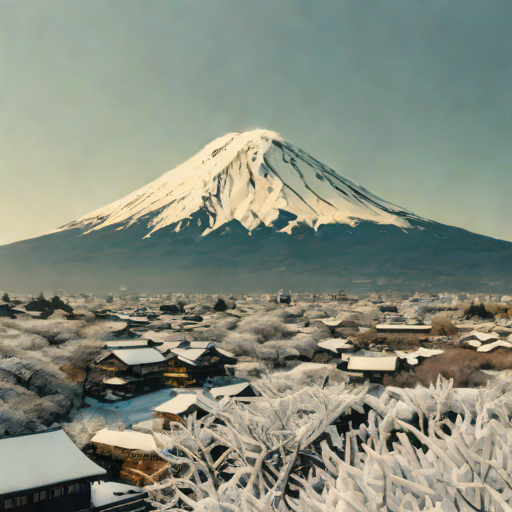

In [9]:
from IPython.display import display
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")
prompt = "Mount Fuji covered in snow"
image = pipe(prompt=prompt, num_inference_steps=4, guidance_scale=0.0).images[0]
display(image)


In [16]:
 #Audio Generation
from transformers import pipeline

# Load a text-to-speech pipeline
tts = pipeline("text-to-speech", model="facebook/mms-tts-eng")

# Generate audio from text
speech = tts("Hello, Hugging Face makes audio generation easy!")

# The output is a dictionary with 'audio' data
print(speech.keys())


Device set to use cuda:0


dict_keys(['audio', 'sampling_rate'])


In [17]:
Audio(speech["audio"], rate=speech["sampling_rate"])

In [ ]:
# Restart the kernel

import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}